In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score,roc_curve,confusion_matrix

In [111]:
pip install jupyterthemes

Note: you may need to restart the kernel to use updated packages.


In [112]:
from jupyterthemes import jtplot

In [113]:
jtplot.style(theme='monokai',context='notebook',ticks=True,grid=False)

In [114]:
# now from here we will load our files to read

instagram_df_train = pd.read_csv('train.csv')
instagram_df_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [115]:
instagram_df_test=pd.read_csv('test.csv') 
instagram_df_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


In [116]:
# perform exploratory data analysis training dataset
instagram_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [117]:
 instagram_df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [118]:
# get the number of unique values in the 'profile pic' feature
instagram_df_train['profile pic'].value_counts()

profile pic
1    404
0    172
Name: count, dtype: int64

In [119]:
#get the number of unique values in "fake" (Target Column)
instagram_df_train['fake'].value_counts()

fake
0    288
1    288
Name: count, dtype: int64

In [120]:
# perform exploratory data analysis on test dataset

instagram_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


In [121]:
instagram_df_test.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000
mean,0.758333,0.179917,1.550000,0.071333,0.041667,27.200000,0.100000,0.308333,82.866667,4.959472e+04,779.266667,0.500000
std,0.429888,0.241492,1.187116,0.209429,0.200664,42.588632,0.301258,0.463741,230.468136,3.816126e+05,1409.383558,0.502096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.725000e+01,119.250000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.165000e+02,354.500000,0.500000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,45.250000,0.000000,1.000000,58.250000,5.932500e+02,668.250000,1.000000
max,1.000000,0.890000,9.000000,1.000000,1.000000,149.000000,1.000000,1.000000,1879.000000,4.021842e+06,7453.000000,1.000000


In [122]:
# get the number of unique values in the 'profile pic' feature
instagram_df_test['profile pic'].value_counts()

profile pic
1    91
0    29
Name: count, dtype: int64

In [123]:
# get the number of unique values in the 'fake' feature
instagram_df_test['fake'].value_counts()

fake
0    60
1    60
Name: count, dtype: int64

# Data Visualization



<Axes: xlabel='fake', ylabel='count'>

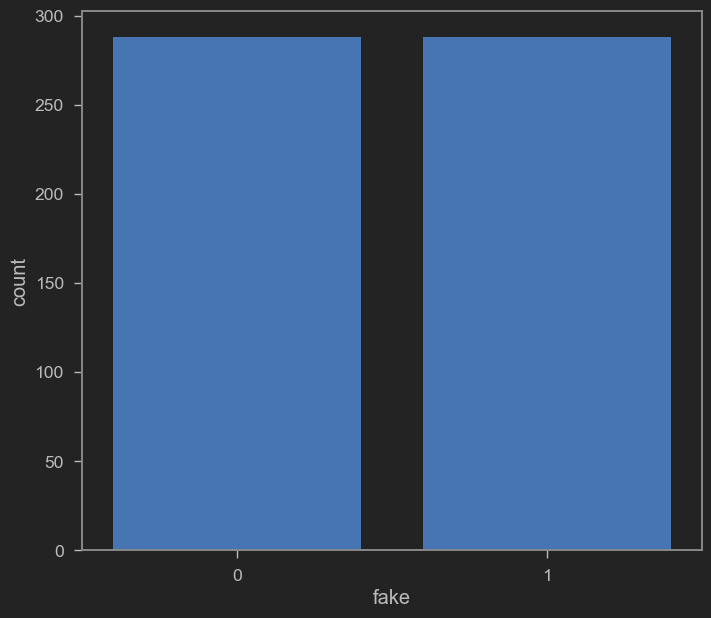

In [124]:
#visualize the data
sns.countplot(x="fake",data=instagram_df_train)

<Axes: xlabel='private', ylabel='count'>

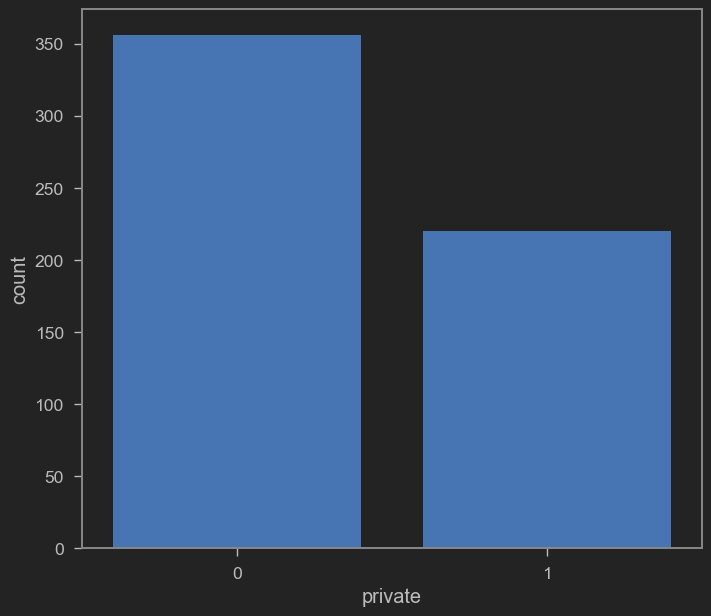

In [125]:
sns.countplot(x="private",data=instagram_df_train)

<Axes: xlabel='profile pic', ylabel='count'>

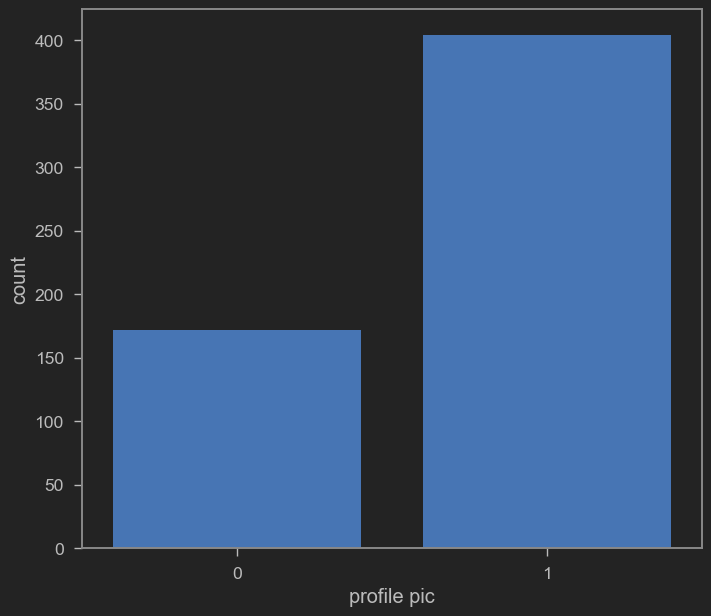

In [126]:
sns.countplot(x="profile pic",data=instagram_df_train)

<Figure size 2000x1000 with 0 Axes>

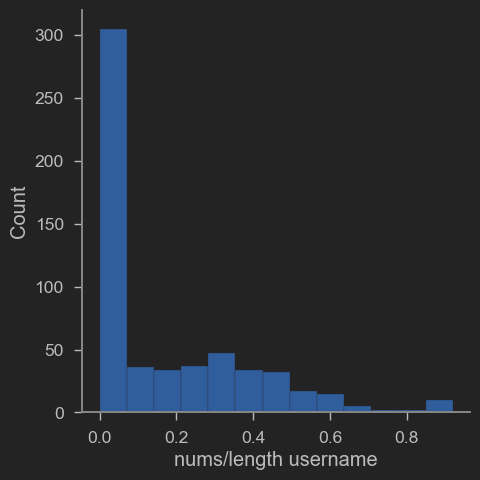

In [127]:
plt.figure(figsize = (20,10))
sns.displot(instagram_df_train['nums/length username'])

<Figure size 2000x2000 with 0 Axes>

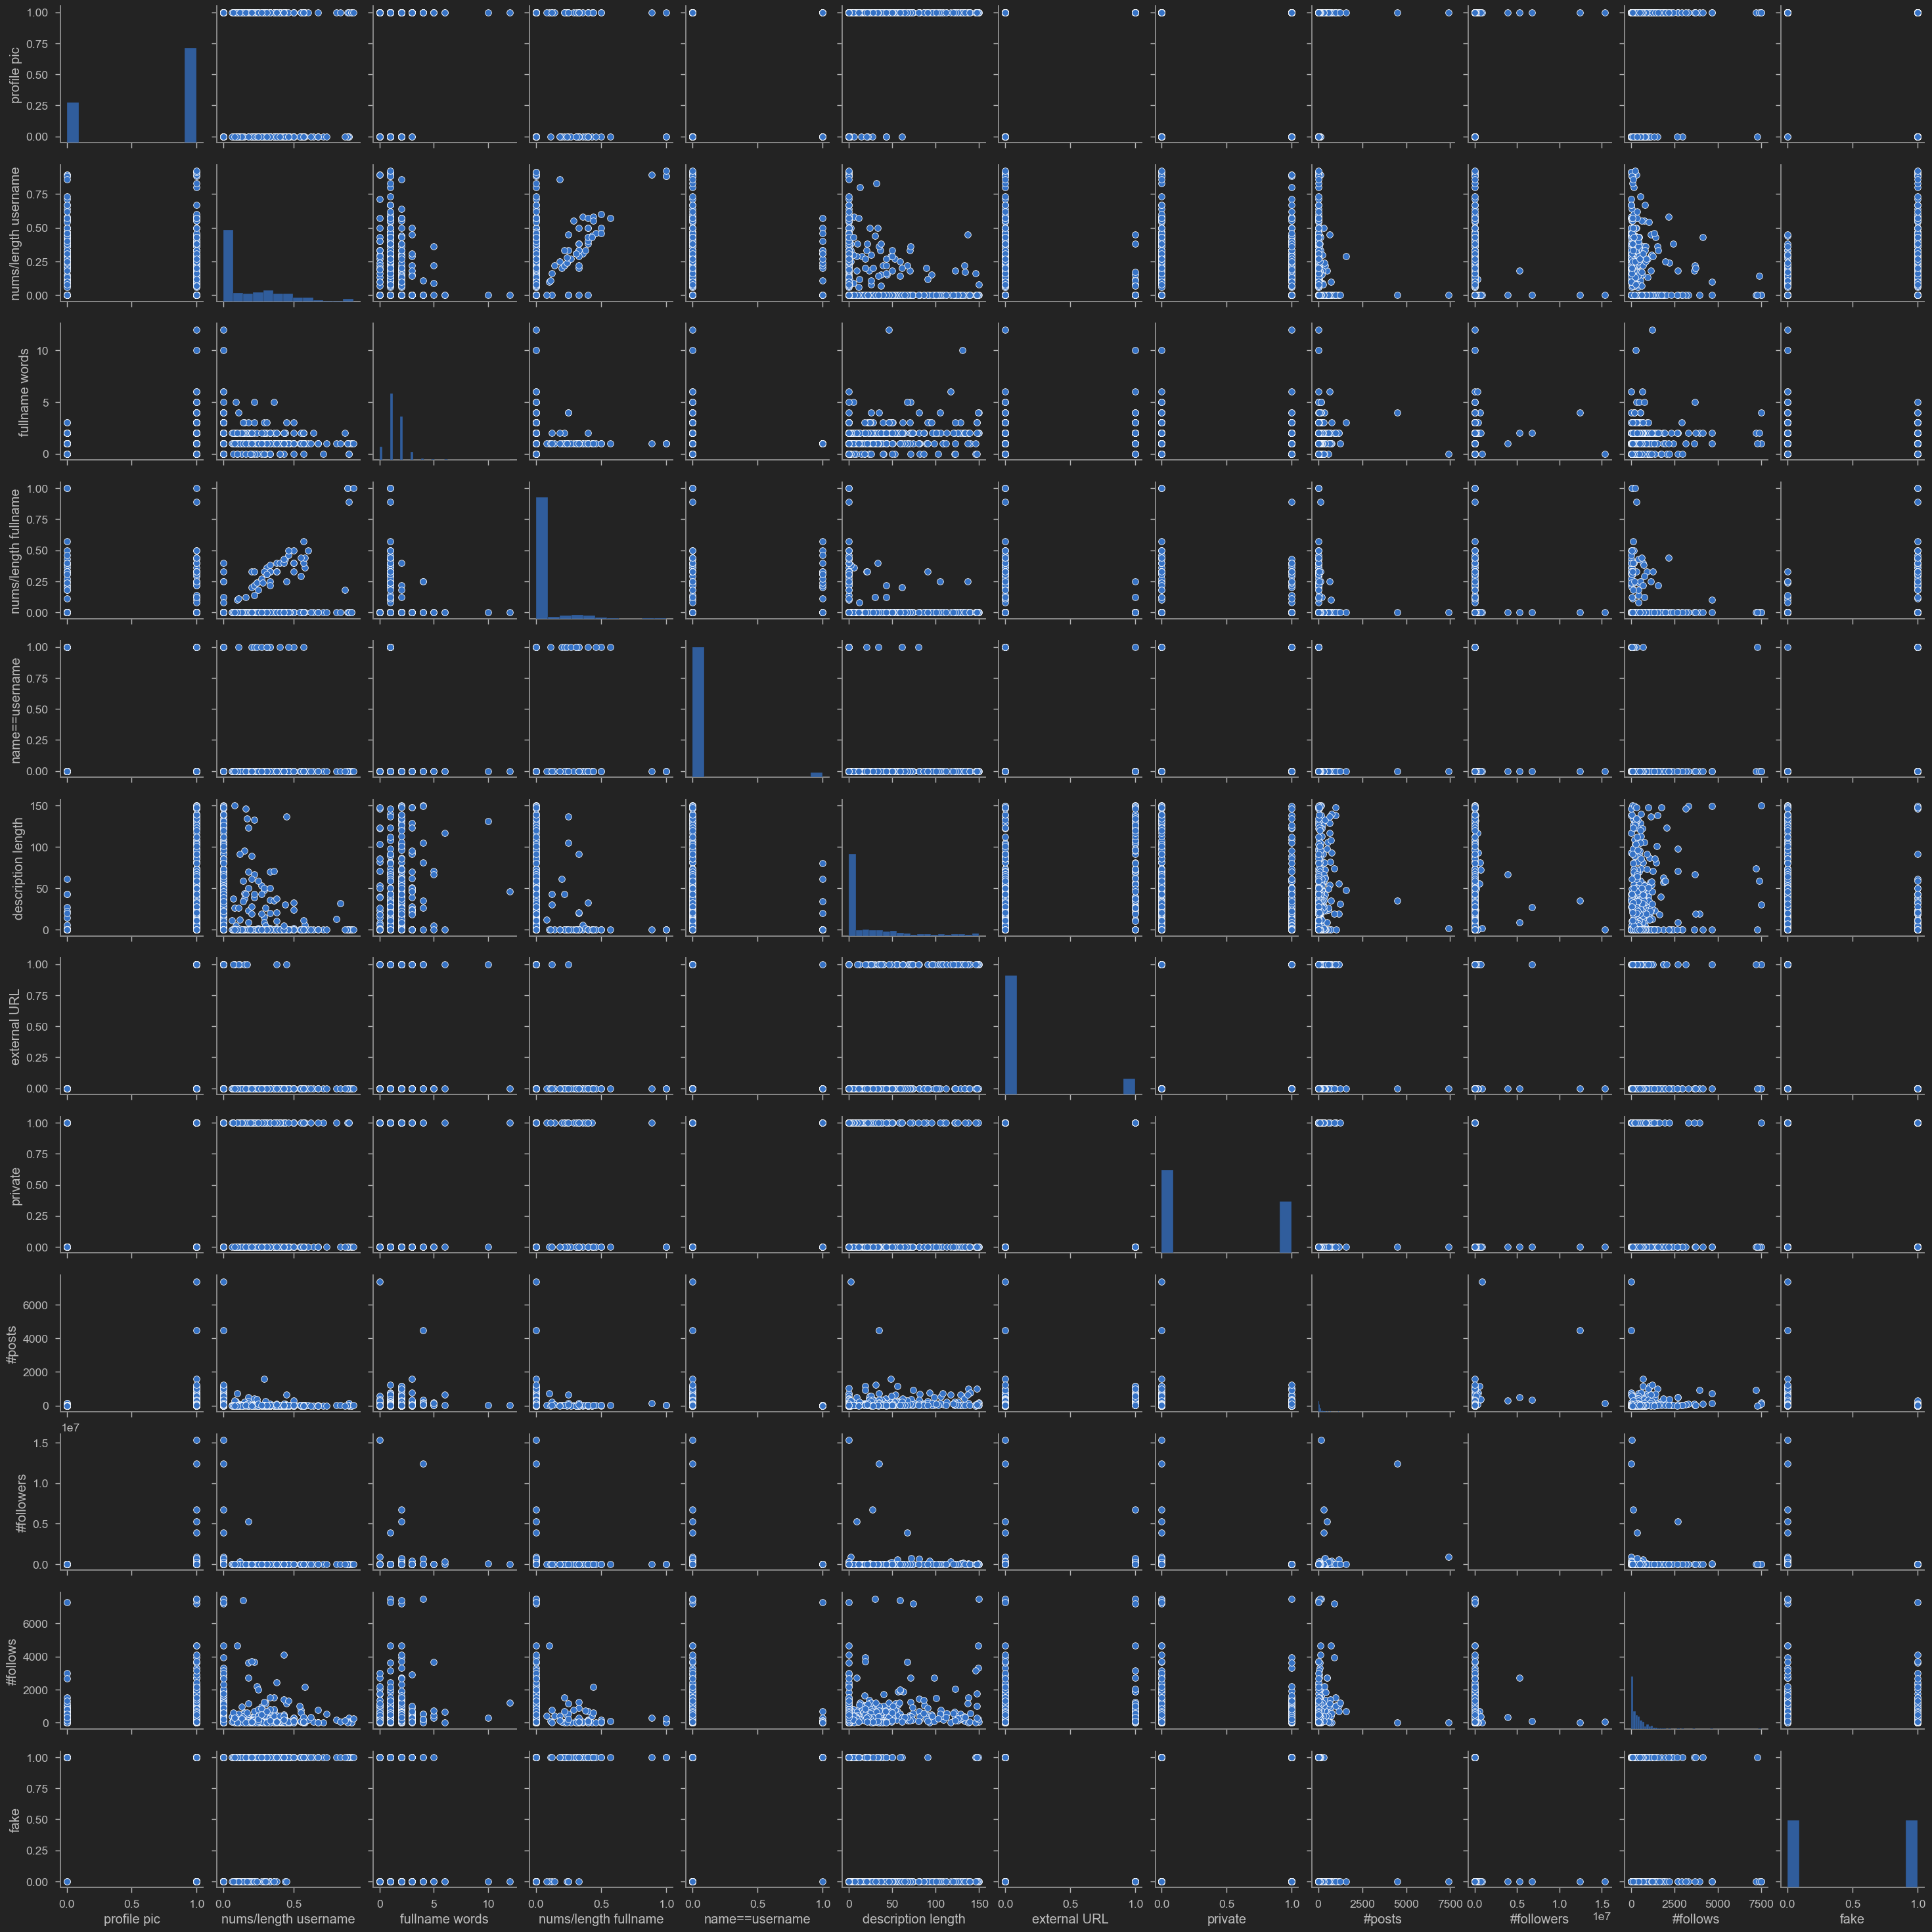

In [128]:
#plot pair plot

plt.figure(figsize = (20, 20))
sns.pairplot(instagram_df_train)

<Axes: >

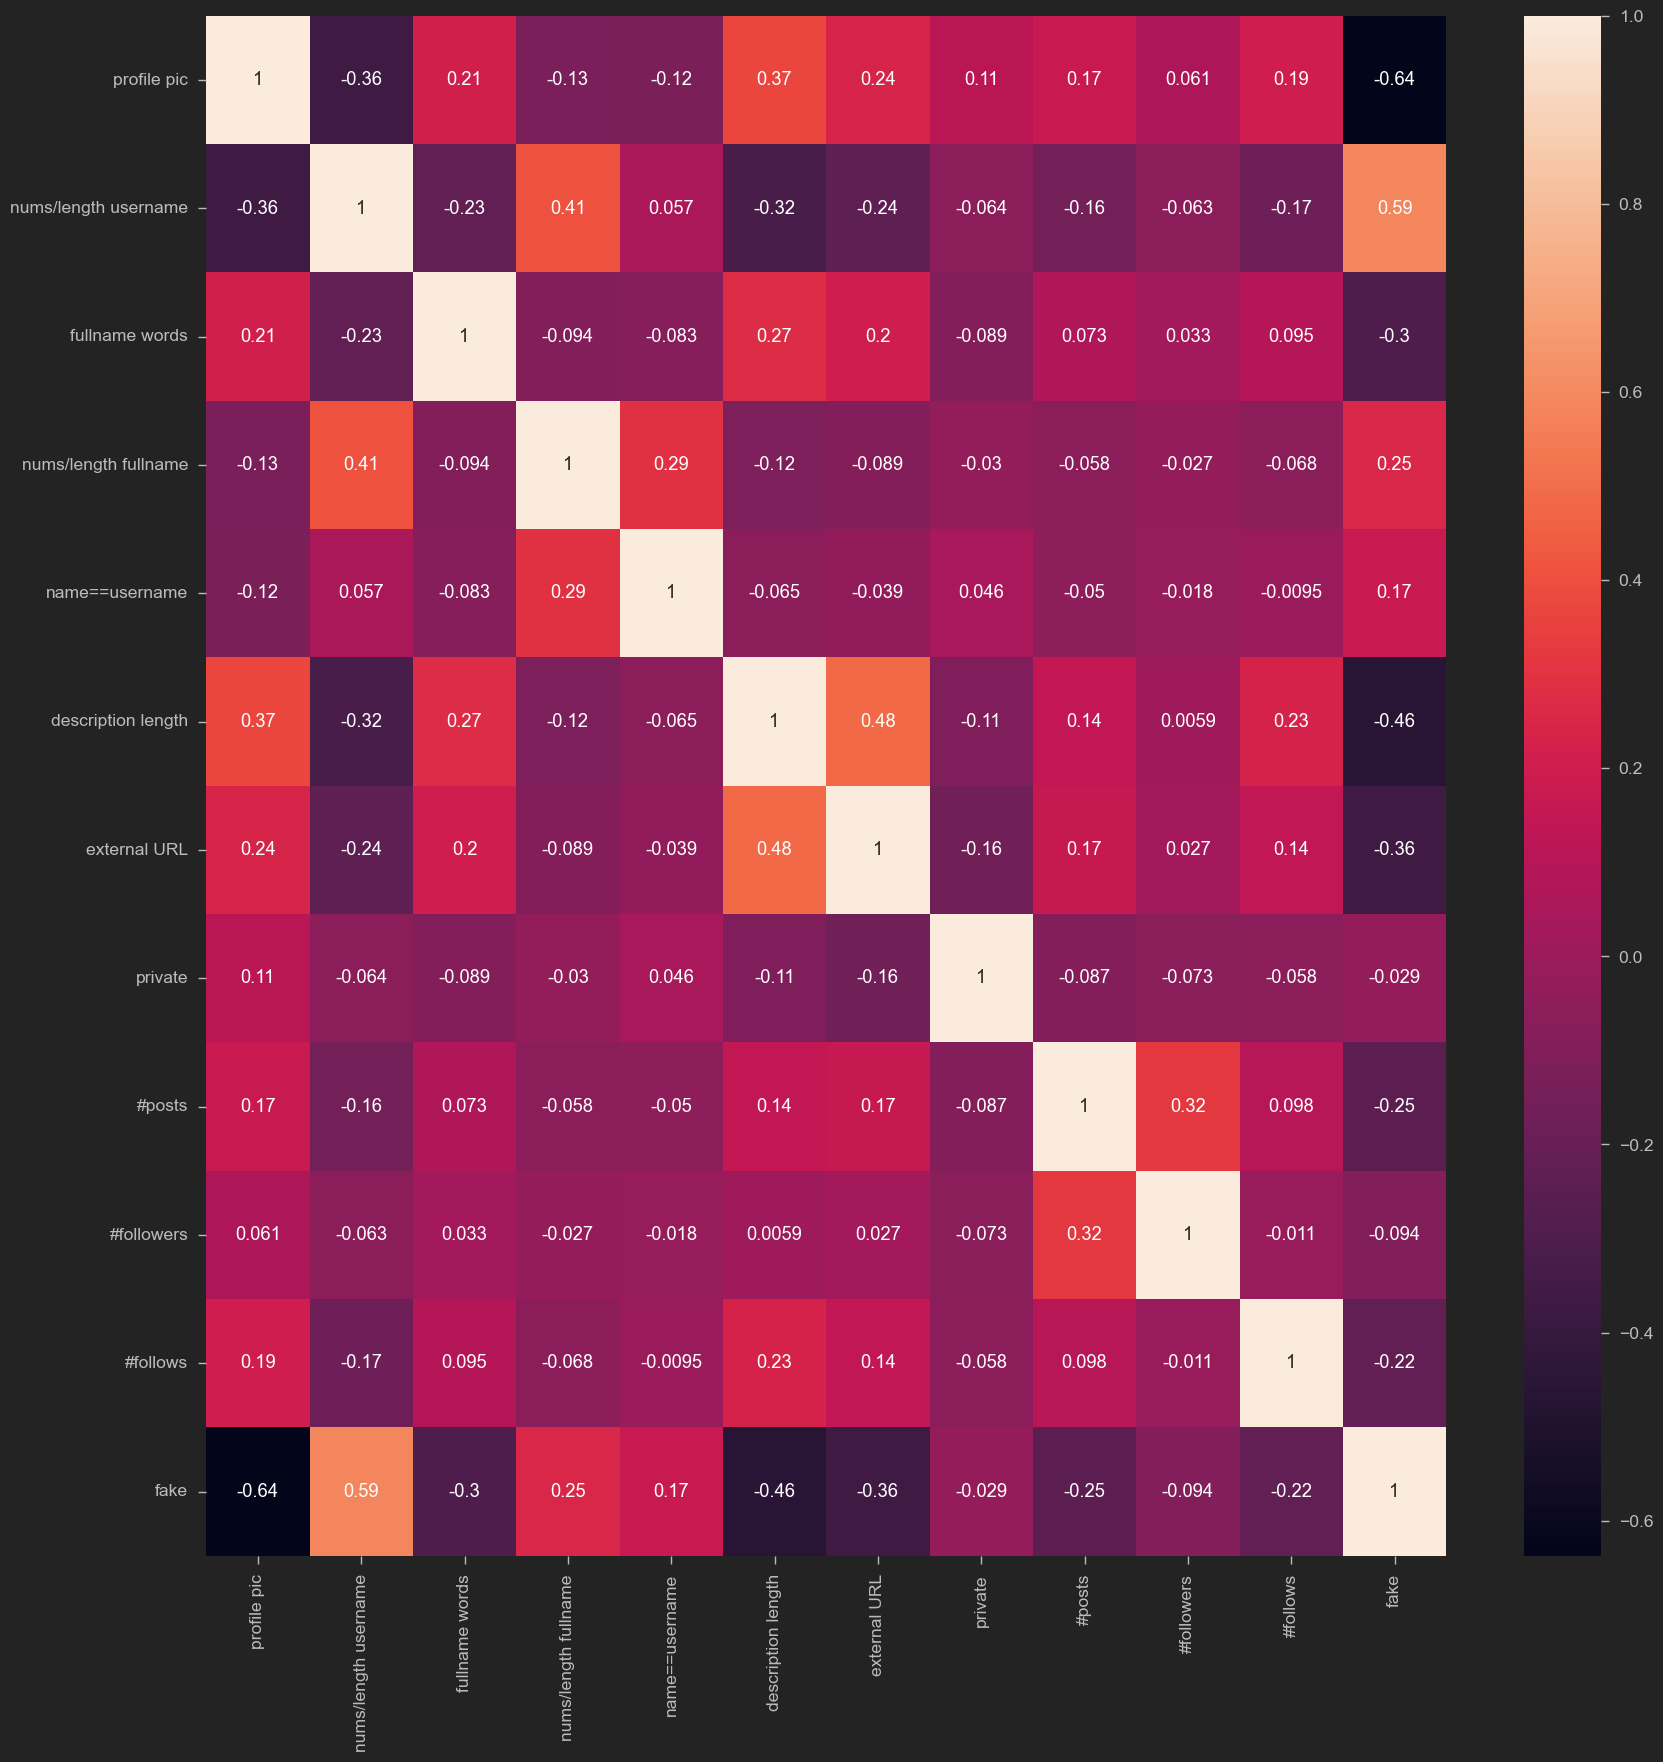

In [129]:
#correalation plot
plt.figure(figsize=(20,20))
cm = instagram_df_train.corr()
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)



PREPARE THE DATA TO FEED THE MODEL

In [130]:
#testing and training dataset (inputs)
X_train = instagram_df_train.drop(columns = ['fake'])
X_test = instagram_df_test.drop(columns = ['fake'])

In [131]:
X_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596
572,1,0.38,1,0.33,0,21,0,0,44,66,75
573,1,0.57,2,0.00,0,0,0,0,4,96,339
574,1,0.57,1,0.00,0,11,0,0,0,57,73


In [132]:
X_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.33,1,0.33,1,30,0,1,35,488,604
1,1,0.00,5,0.00,0,64,0,1,3,35,6
2,1,0.00,2,0.00,0,82,0,1,319,328,668
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369
4,1,0.50,1,0.00,0,76,0,1,6,225,356
...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811
116,1,0.40,1,0.00,0,0,0,0,4,150,164
117,1,0.00,2,0.00,0,0,0,0,3,833,3572
118,0,0.17,1,0.00,0,0,0,0,1,219,1695


In [133]:
#trining and testing dataset (outputs)
y_train = instagram_df_train['fake']
y_test = instagram_df_test['fake']

In [134]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [135]:
y_test

0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    1
117    1
118    1
119    1
Name: fake, Length: 120, dtype: int64

In [136]:
# scale the data before trainig the model

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.fit_transform(X_test)

In [137]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((576, 11), (120, 11), (576,), (120,))

# BUILDING A MACHINE LEARNING MODEL


In [138]:
#Importing the basic librarires for building model  / Classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import  classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold



In [139]:
# splitting the data into train the test

X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size = 0.25, random_state=42)

In [140]:
#Defined object from library Classification

LR = LogisticRegression(max_iter = 1000)
DTR = DecisionTreeClassifier()
GB = GaussianNB()
KNR = KNeighborsClassifier(n_neighbors=5)
model=SVC(C=10, cache_size=200)
RF= RandomForestClassifier(n_estimators=20)


In [141]:
# make for loop for classification

li = [LR,DTR,GB,KNR,model,RF,]

for i in li:
    i.fit(X_train,y_train)
    y_pred = i.predict(X_test)
    print(i,":",classification_report(y_test,y_pred))
    print("*********************************************")

LogisticRegression(max_iter=1000) :               precision    recall  f1-score   support

           0       0.85      0.95      0.90        80
           1       0.93      0.80      0.86        64

    accuracy                           0.88       144
   macro avg       0.89      0.87      0.88       144
weighted avg       0.89      0.88      0.88       144

*********************************************
DecisionTreeClassifier() :               precision    recall  f1-score   support

           0       0.89      0.90      0.89        80
           1       0.87      0.86      0.87        64

    accuracy                           0.88       144
   macro avg       0.88      0.88      0.88       144
weighted avg       0.88      0.88      0.88       144

*********************************************
GaussianNB() :               precision    recall  f1-score   support

           0       0.95      0.47      0.63        80
           1       0.60      0.97      0.74        64

    accuracy

In [142]:
LR.score(X_train,y_train)

0.9212962962962963

In [143]:
DTR.score(X_test,y_test)

0.8819444444444444

In [144]:
GB.score(X_test,y_test)

0.6944444444444444

In [145]:
KNR.score(X_test,y_test)

0.8888888888888888

In [146]:
model.score(X_test,y_test)

0.8888888888888888

In [147]:
RF.score(X_test,y_test)

0.8958333333333334

In [148]:
y_predicted = LR.predict(X_test)

In [149]:
from sklearn.metrics import confusion_matrix

In [150]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[76,  4],
       [13, 51]], dtype=int64)

Text(86.38888888888889, 0.5, 'Truth')

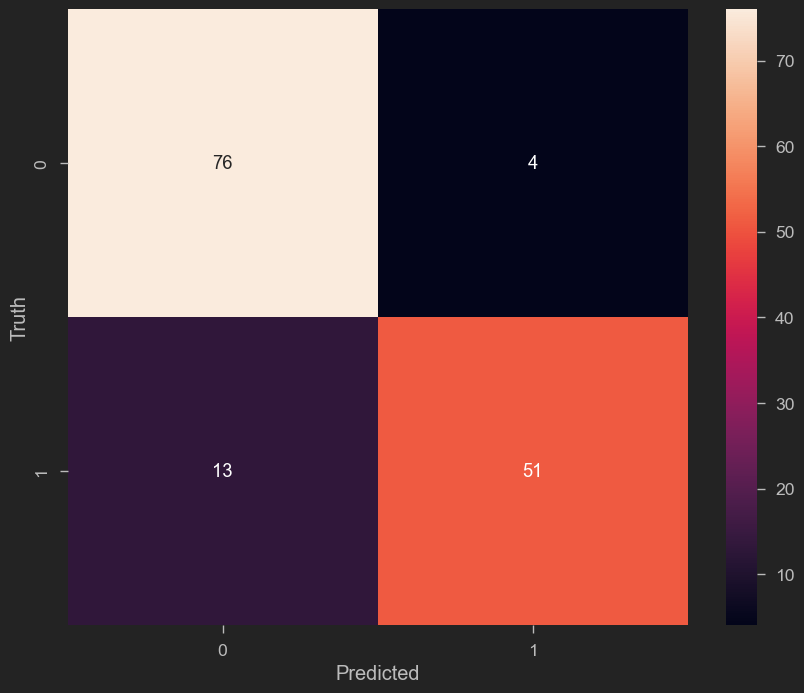

In [151]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [152]:
len(X_train)

432

In [153]:
len(X_test)

144

In [154]:
len(y_test)

144

In [155]:
len(y_train)

432